In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 1
N = 1000
dt = T / N
S0 = 5
μ = 0.06
σ = 0.3
λ = 5

In [3]:
def have_jump():
    num = np.random.uniform()
    if num < λ * dt:
        return True
    else:
        return False


def q_generator():
    z = np.random.normal()
    q = 1 + abs(z) / 10
    return q


def stock_simulator():
    S = np.zeros(N + 1)
    S[0] = S0
    for i in range(1, N + 1):
        q = q_generator()
        jump_cnt = int(have_jump())
        ds = S[i - 1] * (μ * dt + σ * np.sqrt(dt) * np.random.normal() + (q - 1) * jump_cnt)
        S[i] = S[i - 1] + ds
    return S

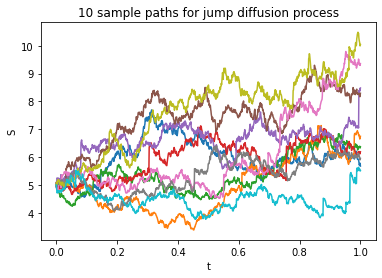

In [4]:
num_of_plots = 10
fig, ax = plt.subplots()
for i in range(num_of_plots):
    ax.plot(np.linspace(0, 1, N + 1), stock_simulator())
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_title('10 sample paths for jump diffusion process')
plt.show()